**Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**

**LOADING PACKAGES AND DATA**

In [103]:
#importing the necessary modules required to solve the problem
#Loading Packages and Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [34]:
bigmart=pd.read_csv("/content/Train.csv")
print(bigmart)
bigtest=pd.read_csv("/content/Test.csv")
print(bigtest)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [35]:
concting=pd.concat([bigtest,bigmart])
print(concting)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

**EXPLORATORY DATA ANALYSIS**

In [36]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
bigmart.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [38]:
bigmart.shape

(8523, 12)

In [39]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**CHECKING FOR MISSING VALUES**

In [40]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**TREATMENT OF MISSING VALUES**

In [41]:
bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean(),inplace=True)
bigmart['Outlet_Size'].fillna(bigmart['Outlet_Size'].mode()[0],inplace=True)

In [42]:
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [44]:
duplicate=bigmart.duplicated()
print(duplicate.sum())

0


**UNIVARIATE AND BIVARIATE**

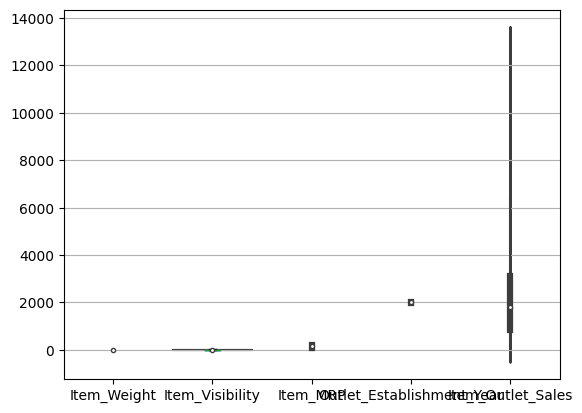

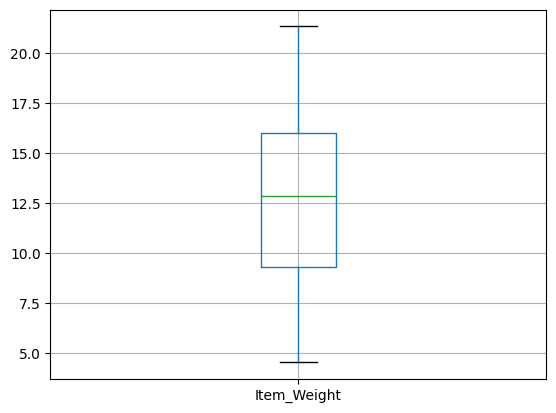

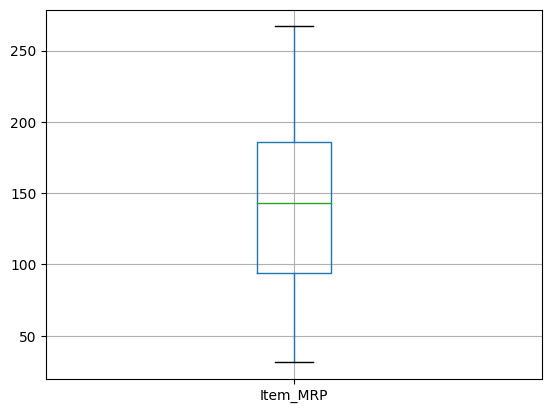

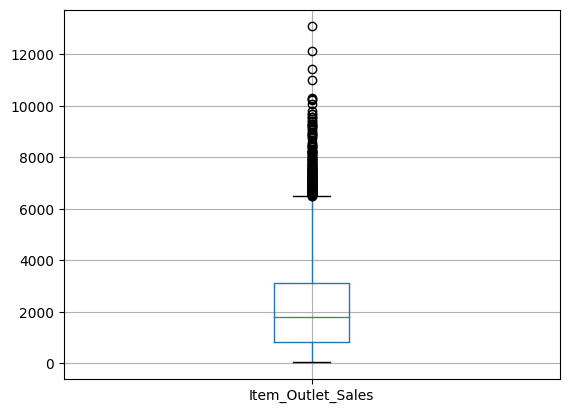

In [45]:
bigmart.boxplot(column=['Item_Weight'])
sns.violinplot(column=['Item_MRP'],data=bigmart)
plt.show()
bigmart.boxplot(column=['Item_Weight'])
plt.show()
bigmart.boxplot(column=['Item_MRP'])
plt.show()
bigmart.boxplot(column=['Item_Outlet_Sales'])
plt.show()

In [46]:
#Finding Datatypes of variables in data set
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

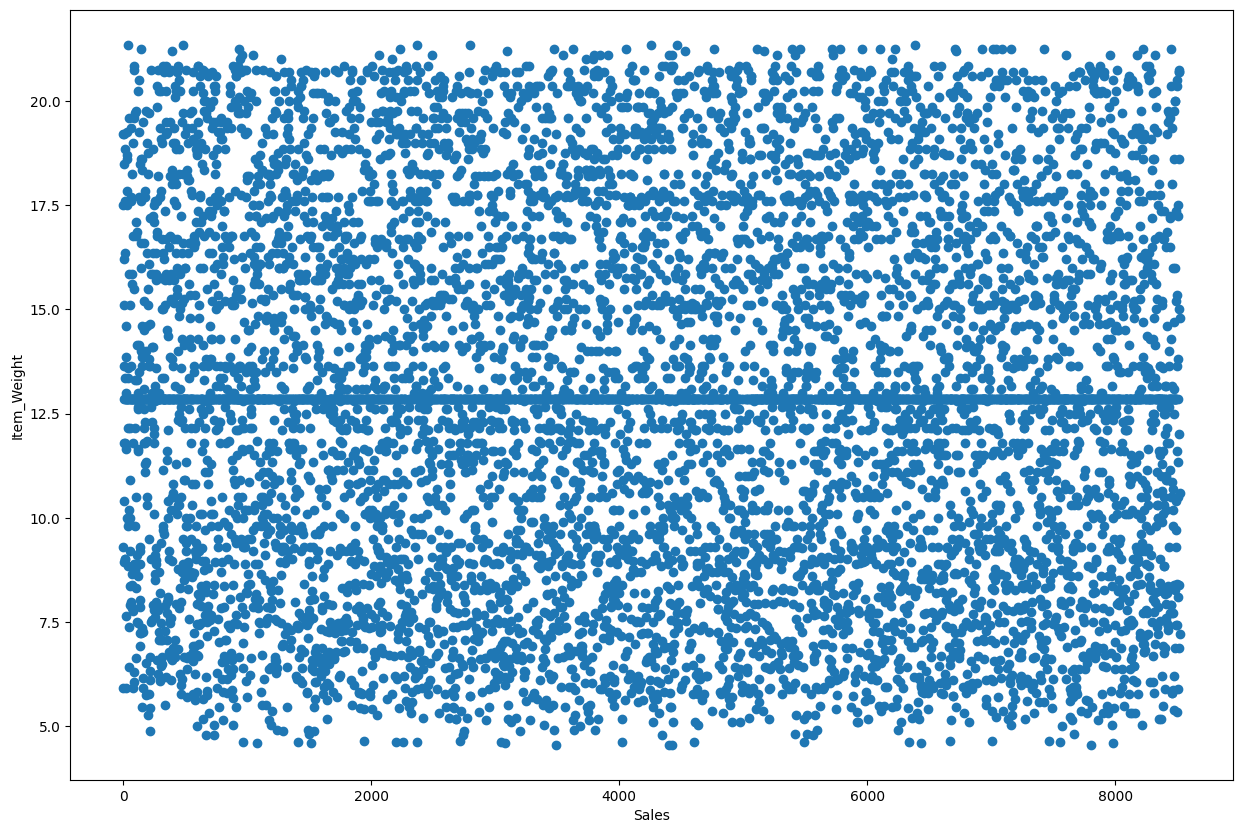

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(bigmart.index,bigmart['Item_Weight'])
plt.ylabel('Item_Weight')
plt.xlabel('Sales')
plt.show() 

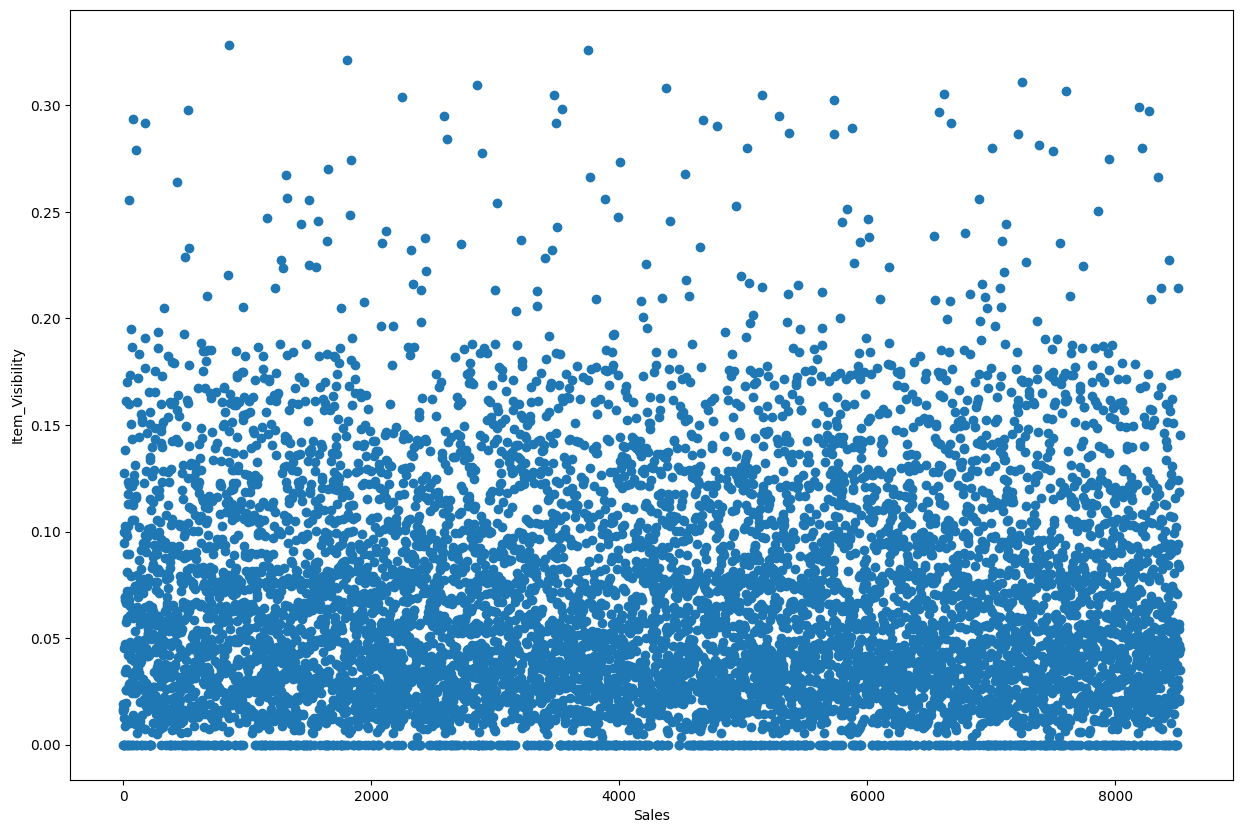

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(bigmart.index,bigmart['Item_Visibility'])
plt.ylabel('Item_Visibility')
plt.xlabel('Sales')
plt.show()

<Axes: ylabel='Item_Outlet_Sales'>

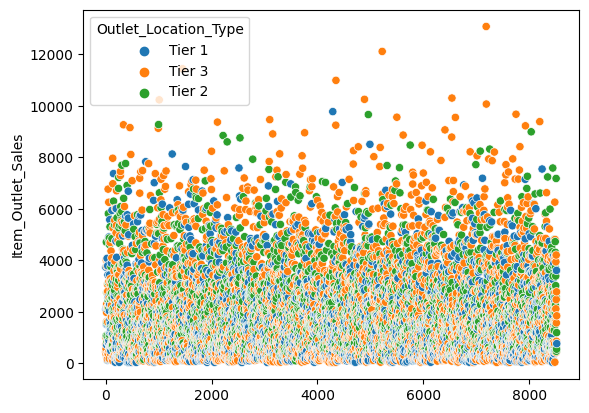

In [49]:
#seaborn scatterplot of Item Outlet Sales with respect to Outlet Location type
sns.scatterplot(x=bigmart.index,y=bigmart['Item_Outlet_Sales'],hue=bigmart['Outlet_Location_Type'])

**REMOVING OUTLIERS**

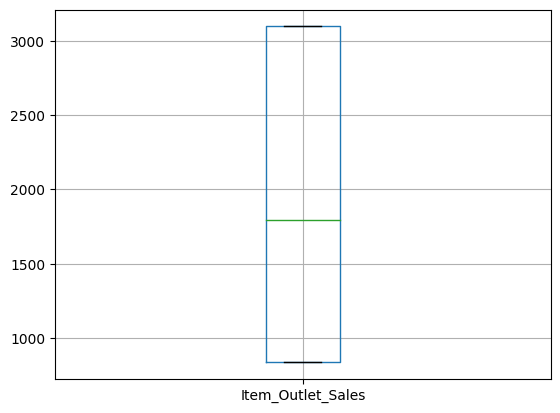

In [50]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    lower_range=q1-(1.5 * 0.25)
    upper_range=q3-(1.5 *0.75)
    return lower_range,upper_range
lowsales,uppsales=remove_outlier(concting['Item_Outlet_Sales'])
bigmart['Item_Outlet_Sales']=np.where(bigmart['Item_Outlet_Sales']>uppsales,uppsales,bigmart['Item_Outlet_Sales'])
bigmart['Item_Outlet_Sales']=np.where(bigmart['Item_Outlet_Sales']<lowsales,lowsales,bigmart['Item_Outlet_Sales'])
bigmart.boxplot(column=['Item_Outlet_Sales'])
plt.show()

<ipython-input-51-3e103ff42bf0>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covv=bigmart.cov()
<ipython-input-51-3e103ff42bf0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=bigmart.corr()
<ipython-input-51-3e103ff42bf0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bigmart.corr(),annot=True)



                            Item_Weight  Item_Visibility      Item_MRP  \
Item_Weight                  17.860122        -0.002627      6.515364   
Item_Visibility              -0.002627         0.002662     -0.004225   
Item_MRP                      6.515364        -0.004225   3878.183909   
Outlet_Establishment_Year    -0.293684        -0.032325      2.617143   
Item_Outlet_Sales            64.949384        -6.493954  32156.223367   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.293684          64.949384  
Item_Visibility                            -0.032325          -6.493954  
Item_MRP                                    2.617143       32156.223367  
Outlet_Establishment_Year                  70.086372         -27.820732  
Item_Outlet_Sales                         -27.820732      850615.204255  

                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000      

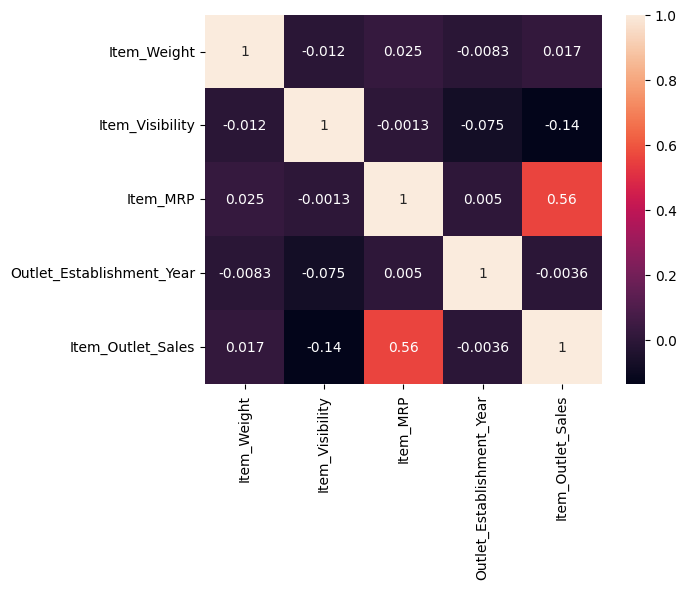

In [51]:
#Bivariate Analysis
covv=bigmart.cov()
print("\n",covv)

corr=bigmart.corr()
print("\n",corr)

sns.heatmap(bigmart.corr(),annot=True)
plt.show()

**FEATURE ENGINEERING**

In [52]:
#initialize Encoder
le=LabelEncoder()

In [53]:
# Transforming Categorical Variables (Item_Fat_Content, Outlet_Size & Outlet_Type)
bigmart['Item_Fat_Content']= le.fit_transform(bigmart['Item_Fat_Content'])
bigmart['Item_Type']= le.fit_transform(bigmart['Item_Type'])
bigmart['Outlet_Size']= le.fit_transform(bigmart['Outlet_Size'])
bigmart['Outlet_Location_Type']= le.fit_transform(bigmart['Outlet_Location_Type'])
bigmart['Outlet_Type']= le.fit_transform(bigmart['Outlet_Type'])

In [54]:
bigmart.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7137,FDZ04,9.310000,1,0.038032,5,61.3510,OUT045,2002,1,1,1,833.8724
2160,FDS50,17.000000,1,0.055520,4,219.8114,OUT049,1999,1,0,1,1108.5570
5070,NCJ19,12.857645,1,0.117608,11,55.2588,OUT027,1985,1,2,3,2748.4224
8194,FDY15,12.857645,2,0.299098,4,157.8630,OUT019,1985,2,0,0,833.8724
6812,NCM55,15.600000,1,0.066726,11,185.8924,OUT046,1997,2,0,1,3100.1714


**ENCODING CATEGOTICAL VARIABLES AND ONE HOT ENCODING**

In [55]:
from sklearn import preprocessing
print(bigmart.head())
O_TYPE = pd.get_dummies(bigmart['Outlet_Type'])
O_LOCATION_T = pd.get_dummies(bigmart['Outlet_Location_Type'])
O_SIZE = pd.get_dummies(bigmart['Outlet_Size'])
I_FAT = pd.get_dummies(bigmart['Item_Fat_Content'])

big_dataset = pd.concat([bigmart,O_TYPE,O_LOCATION_T,O_SIZE,I_FAT],axis=1)
print(big_dataset)

label = big_dataset['Item_Outlet_Sales']

train = big_dataset.drop(columns=['Item_Identifier','Item_Weight','Outlet_Type','Outlet_Identifier','Item_Fat_Content','Item_Outlet_Sales','Outlet_Location_Type','Item_Type','Outlet_Size','Outlet_Establishment_Year'])
print(train)
data_types_dict = {'Item_Identifier': int,'Item_Fat_Content': int,'Item_Type': int,'Outlet_Identifier': int
    ,'Outlet_Size': int,'Outlet_Location_Type': int,'Outlet_Type': int}

  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 1         0.016047          4   
1           DRC01         5.92                 2         0.019278         14   
2           FDN15        17.50                 1         0.016760         10   
3           FDX07        19.20                 2         0.000000          6   
4           NCD19         8.93                 1         0.000000          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            1   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     

**LABEL ENCODING**

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [57]:
bigmart['Item_Identifier'] = encoder.fit_transform(bigmart['Item_Identifier'])
bigmart['Item_Fat_Content'] = encoder.fit_transform(bigmart['Item_Fat_Content'])
bigmart['Item_Type'] = encoder.fit_transform(bigmart['Item_Type'])
bigmart['Outlet_Identifier'] = encoder.fit_transform(bigmart['Outlet_Identifier'])
bigmart['Outlet_Size'] = encoder.fit_transform(bigmart['Outlet_Size'])
bigmart['Outlet_Location_Type'] = encoder.fit_transform(bigmart['Outlet_Location_Type'])
bigmart['Outlet_Type'] = encoder.fit_transform(bigmart['Outlet_Type'])

In [58]:
X = bigmart.drop(columns='Item_Outlet_Sales', axis=1)
Y = bigmart['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**ML MODEL - LINEAR REGRESSION**

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [62]:
regressor = LinearRegression()

In [63]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [64]:
training_data_prediction = regressor.predict(X_train)

In [65]:
r2_train = r2_score(Y_train, training_data_prediction)

In [66]:
print('R Squared value = ', r2_train)

R Squared value =  0.48745737430859026


In [67]:
test_data_prediction = regressor.predict(X_test)

In [68]:
r2_test = r2_score(Y_test, test_data_prediction)

In [69]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.46993453216083936


**REGULARIZED LINEAR REGRESSION**


**LASSO**

In [70]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [71]:
training_data_prediction = regressor.predict(X_train)

In [72]:
r2_train = r2_score(Y_train, training_data_prediction)

In [73]:
print('R Squared value = ', r2_train)

R Squared value =  0.4874526080497038


In [74]:
test_data_prediction = regressor.predict(X_test)

In [75]:
r2_test = r2_score(Y_test, test_data_prediction)

In [76]:
print('R Squared value = ', r2_test)

R Squared value =  0.46990773656477514


**RIDGE**

In [77]:
training_data_prediction = regressor.predict(X_train)

In [78]:
r2_train = r2_score(Y_train, training_data_prediction)

In [79]:
print('R Squared value = ', r2_train)

R Squared value =  0.4874526080497038


In [80]:
test_data_prediction = regressor.predict(X_test)

In [81]:
r2_test = r2_score(Y_test, test_data_prediction)

In [82]:
print('R Squared value = ', r2_test)

R Squared value =  0.46990773656477514


**RANDOM FOREST REGRESSION**

In [104]:
#Random Forest Regressor
rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

In [83]:
training_data_prediction = regressor.predict(X_train)

In [84]:
r2_train =r2_score(Y_train, training_data_prediction)

In [85]:
print('R Squared value = ', r2_train)

R Squared value =  0.4874526080497038


In [86]:
test_data_prediction = regressor.predict(X_test)

In [106]:
pred=rf.predict(X_test)

In [108]:
print(math.sqrt(mean_squared_error(Y_test,pred)))

613.1614159159403


In [87]:
r2_test = r2_score(Y_test, test_data_prediction)

In [88]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.46990773656477514


**XGBOOST**

In [89]:
from xgboost import XGBRegressor
regressor = XGBRegressor()


In [90]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [91]:
training_data_prediction = regressor.predict(X_train)

In [92]:
r2_train = r2_score(Y_train, training_data_prediction)

In [93]:
print('R Squared value = ', r2_train)

R Squared value =  0.8521130988392573


In [94]:
test_data_prediction = regressor.predict(X_test)

In [110]:
Y_pred=regressor.predict(X_test)

In [111]:
print(math.sqrt(mean_squared_error(Y_test,Y_pred)))

624.040894245062


In [95]:
r2_test = r2_score(Y_test, test_data_prediction)

In [96]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.539784228541107


**FINAL PREDICTION**

In [112]:
final_pred = rf.predict(X_test)
final_pred


array([2252.1684588, 2142.3843332, 1659.1655028, ..., 2598.9022032,
       2466.5563548, 2755.7945316])

In [114]:
s=pd.read_csv('/content/Train.csv')

In [115]:
selected_col=['Item_Identifier','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Size','Outlet_Type']
st=s[selected_col].copy()

In [118]:
model = pd.concat([pd.DataFrame(st.values, columns=st.columns), pd.DataFrame(Y_test.values, columns=['Actual']),pd.DataFrame(final_pred, columns=['Predicted'])], axis=1)


In [119]:
model.head(10)

,Item_Identifier,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Size,Outlet_Type,Actual,Predicted
0,FDA15,Dairy,249.8092,Tier 1,Medium,Supermarket Type1,1544.6560,2252.168459
1,DRC01,Soft Drinks,48.2692,Tier 3,Medium,Supermarket Type2,3100.1714,2142.384333
2,FDN15,Meat,141.618,Tier 1,Medium,Supermarket Type1,1070.6064,1659.165503
3,FDX07,Fruits and Vegetables,182.095,Tier 3,NaN,Grocery Store,833.8724,833.872400
4,NCD19,Household,53.8614,Tier 3,High,Supermarket Type1,833.8724,833.872400
5,FDP36,Baking Goods,51.4008,Tier 3,Medium,Supermarket Type2,833.8724,855.852312
6,FDO10,Snack Foods,57.6588,Tier 3,High,Supermarket Type1,3100.1714,2943.452189
7,FDP10,Snack Foods,107.7622,Tier 3,Medium,Supermarket Type3,3100.1714,2469.671087
8,FDH17,Frozen Foods,96.9726,Tier 2,NaN,Supermarket Type1,3100.1714,3068.819812
9,FDU28,Frozen Foods,187.8214,Tier 2,NaN,Supermarket Type1,1338.2580,1829.159288


**SUMMARY**

The goal of this project is to develop a predictive model to estimate the sales of each product at each store.
The project involves collecting and analyzing historical sales data for each product at the store as well as other trends.
After cleaning and pre-processing the data and applying various machine learning algorithms  the model is finally ready.
first step was train the model then evaluate on test data set to assess its accuracy. 
Once the model is ready, the necessary information can be valuable for inventory management,sales forcasting,and decision making related to promotional activities.

          Linear regression
R·Squared·value·= 0.46993453216083936
           it is low 

         Random Forest Regression
R·Squared·value·= 0.46990773656477514

          XGBRegression
R·Squared·value·= 0.539784228541107

Among all the models XGBRegression gave the best Accuracy 0.539784228541107